In [4]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv('/Users/masato/Documents/GitHub/ML_Practice/CSV/Survived.csv')
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.shape

(891, 11)

In [10]:
df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x = df[col]
t = df['Survived']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,t, test_size= 0.2, random_state =0)
x_train.shape

(712, 5)

In [14]:
model = tree.DecisionTreeClassifier(max_depth = 5,
                                    random_state = 0,
                                    class_weight = 'balanced')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [15]:
model.score(X = x_test, y = y_test)

0.7039106145251397

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def learn(x, t, depth=3):
    x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)
    model = DecisionTreeClassifier(max_depth=depth, random_state=0, class_weight='balanced')
    model.fit(x_train, y_train)

    score = model.score(X=x_train, y=y_train)
    score2 = model.score(X=x_test, y=y_test)
    return round(score, 3), round(score2, 3), model


In [23]:
for j in range(1, 15):
    train_score, test_score, model = learn(x, t, depth=j)
    sentence = 'Train data score: {}'
    sentence2 = 'Test data score: {}'
    total_sentence = 'depth {}: ' + sentence + ', ' + sentence2
    print(total_sentence.format(j, train_score, test_score))


depth 1: Train data score: 0.659, Test data score: 0.704
depth 2: Train data score: 0.659, Test data score: 0.704
depth 3: Train data score: 0.691, Test data score: 0.721
depth 4: Train data score: 0.694, Test data score: 0.709
depth 5: Train data score: 0.713, Test data score: 0.704
depth 6: Train data score: 0.733, Test data score: 0.737
depth 7: Train data score: 0.74, Test data score: 0.687
depth 8: Train data score: 0.754, Test data score: 0.698
depth 9: Train data score: 0.749, Test data score: 0.698
depth 10: Train data score: 0.794, Test data score: 0.67
depth 11: Train data score: 0.788, Test data score: 0.67
depth 12: Train data score: 0.796, Test data score: 0.693
depth 13: Train data score: 0.794, Test data score: 0.715
depth 14: Train data score: 0.799, Test data score: 0.698


In [24]:
df.groupby('Survived').mean()['Age']

/var/folders/fz/wm91sxn95l991r7fg209ds7m0000gn/T/ipykernel_99393/3987497164.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Survived').mean()['Age']


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [25]:
df.groupby('Pclass').mean()['Age']

/var/folders/fz/wm91sxn95l991r7fg209ds7m0000gn/T/ipykernel_99393/328810730.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Pclass').mean()['Age']


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [30]:
pd.pivot_table(df, index = 'Survived', columns = 'Pclass',
    values = 'Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [33]:
pd.pivot_table(df, index = 'Survived', columns = 'Pclass',
    values = 'Age', aggfunc= max)

Pclass,1,2,3
Survived,,,
0,71.0,70.0,74.0
1,80.0,62.0,63.0


In [50]:
is_null = df['Age'].isnull()

df.loc[(df['Pclass'] == 1) & (df['Survived'] == 0)
    &(is_null), 'Age'] = 43
df.loc[(df['Pclass'] == 1) & (df['Survived'] == 1)
    &(is_null), 'Age'] = 35

df.loc[(df['Pclass'] == 2) & (df['Survived'] == 0)
    &(is_null), 'Age'] = 33
df.loc[(df['Pclass'] == 1) & (df['Survived'] == 1)
    &(is_null), 'Age'] = 25

df.loc[(df['Pclass'] == 2) & (df['Survived'] == 0)
    &(is_null), 'Age'] = 26
df.loc[(df['Pclass'] == 1) & (df['Survived'] == 1)
    &(is_null), 'Age'] = 20

In [51]:
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x = df[col]
t = df['Survived']

for j in range(1, 15):
    train_score, test_score, model = learn(x, t, depth=j)
    sentence = 'Train data score: {}'
    sentence2 = 'Test data score: {}'
    total_sentence = 'depth {}: ' + sentence + ', ' + sentence2
    print(total_sentence.format(j, train_score, test_score))

depth 1: Train data score: 0.659, Test data score: 0.704
depth 2: Train data score: 0.659, Test data score: 0.704
depth 3: Train data score: 0.663, Test data score: 0.709
depth 4: Train data score: 0.695, Test data score: 0.715
depth 5: Train data score: 0.73, Test data score: 0.777
depth 6: Train data score: 0.725, Test data score: 0.709
depth 7: Train data score: 0.744, Test data score: 0.749
depth 8: Train data score: 0.785, Test data score: 0.771
depth 9: Train data score: 0.81, Test data score: 0.732
depth 10: Train data score: 0.819, Test data score: 0.771
depth 11: Train data score: 0.837, Test data score: 0.743
depth 12: Train data score: 0.86, Test data score: 0.771
depth 13: Train data score: 0.853, Test data score: 0.726
depth 14: Train data score: 0.843, Test data score: 0.749


In [52]:
sex = df.groupby('Sex').mean()
sex['Survived']

/var/folders/fz/wm91sxn95l991r7fg209ds7m0000gn/T/ipykernel_99393/2508444881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sex = df.groupby('Sex').mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

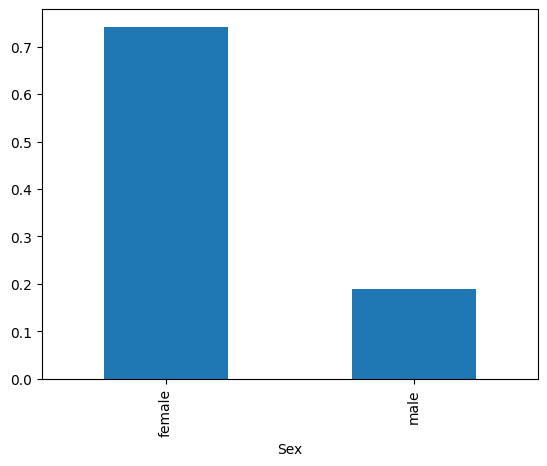

In [53]:
sex['Survived'].plot(kind = 'bar')

In [54]:
male = pd.get_dummies(df['Sex'], drop_first = True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [55]:
pd.get_dummies(df['Embarked'], drop_first = False)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [56]:
pd.get_dummies(df['Embarked'], drop_first = True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [57]:
x_temp = pd.concat([x,male], axis = 1)

x_temp.head(2)

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0


In [58]:
tmp = pd.concat([x,x], axis = 0)
tmp.shape

(1782, 5)

In [59]:
for j in range(1, 6):
    train_score, test_score, model = learn(x_temp, t, depth=j)
    sentence = 'Train data score: {}'
    sentence2 = 'Test data score: {}'
    total_sentence = 'depth {}: ' + sentence + ', ' + sentence2
    print(total_sentence.format(j, train_score, test_score))

depth 1: Train data score: 0.787, Test data score: 0.788
depth 2: Train data score: 0.787, Test data score: 0.788
depth 3: Train data score: 0.787, Test data score: 0.788
depth 4: Train data score: 0.819, Test data score: 0.782
depth 5: Train data score: 0.784, Test data score: 0.804


In [60]:
train_score, test_score, model = learn(x_temp, t, depth = 5)

import pickle
with open('survived.pkl', 'wb') as f:
    pickle.dump(model, f)

In [61]:
model.feature_importances_

array([0.02566652, 0.20464196, 0.        , 0.08051392, 0.2489039 ,
       0.4402737 ])

In [62]:
pd.DataFrame(model.feature_importances_, index=x_temp.columns)

,0
Pclass,0.025667
Age,0.204642
SibSp,0.000000
Parch,0.080514
Fare,0.248904
male,0.440274
